<h1 align=center><font size = 5>Peer Review Final Assignment</font></h1>

## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

In [ ]:
#!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

In [ ]:
#!zip concrete_data_week4.zip

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

<a id="item42"></a>

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input 
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [2]:
train_dir = r'C:\Users\Dennis\Desktop\AI Capstone Project with Deep Learning\concrete_data_week4\train'
validation_dir = r'C:\Users\Dennis\Desktop\AI Capstone Project with Deep Learning\concrete_data_week4\valid'
test_dir =r'C:\Users\Dennis\Desktop\AI Capstone Project with Deep Learning\concrete_data_week4\test'

In [3]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=100,
        class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=100,
        class_mode='categorical')

Found 30000 images belonging to 2 classes.
Found 9500 images belonging to 2 classes.


In [4]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [5]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
conv_base.trainable = False

In [7]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(2,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 50178     
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
checkpoint = ModelCheckpoint("vgg16.h5",monitor='val_loss',verbose=1,save_best_only=True)

In [11]:
early = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1)

In [12]:
history = model.fit_generator(generator=train_generator,steps_per_epoch=3,epochs=5,verbose=1,
                             validation_data=validation_generator,validation_steps=5,callbacks=[checkpoint,early])

Epoch 1/5
2/3 [===================>..........] - ETA: 2:51 - loss: 0.9101 - accuracy: 0.5800
Epoch 00001: val_loss improved from inf to 0.51783, saving model to vgg16.h5
3/3 [==============================] - 767s 256s/step - loss: 0.7215 - accuracy: 0.6967 - val_loss: 0.5178 - val_accuracy: 0.5780
Epoch 2/5
2/3 [===================>..........] - ETA: 2:51 - loss: 0.4982 - accuracy: 0.6800
Epoch 00002: val_loss improved from 0.51783 to 0.19915, saving model to vgg16.h5
3/3 [==============================] - 783s 261s/step - loss: 0.4007 - accuracy: 0.7733 - val_loss: 0.1991 - val_accuracy: 0.9420
Epoch 3/5
2/3 [===================>..........] - ETA: 2:57 - loss: 0.2160 - accuracy: 0.9300
Epoch 00003: val_loss did not improve from 0.19915
3/3 [==============================] - 755s 252s/step - loss: 0.2165 - accuracy: 0.9167 - val_loss: 0.2091 - val_accuracy: 0.9080
Epoch 4/5
2/3 [===================>..........] - ETA: 2:35 - loss: 0.1507 - accuracy: 0.9400
Epoch 00004: val_loss improve

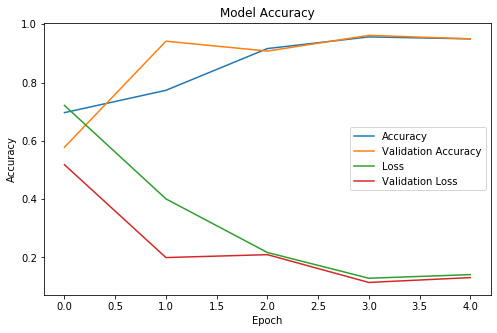

In [13]:
#Plot Graph to see the result
plt.figure(figsize=(8,5))
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()

In [14]:
#Save the model
model.save('vgg16.h5')

In [16]:
del model

In [12]:
vgg16 = load_model('vgg16.h5')

In [13]:
vgg16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 50178     
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

### Load ResNet and VGG16 for Model Evaluation

In [14]:
resnet = load_model("resnet.h5")

In [16]:
resnet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________


In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=100,
        class_mode='categorical',
        shuffle=False)

Found 500 images belonging to 2 classes.


In [18]:
len(test_generator)

5

In [19]:
res_score = resnet.evaluate_generator(test_generator,steps=5,verbose=1)

5/5 [==============================] - 469s 94s/step - loss: 1.3265 - accuracy: 0.5000


In [20]:
res_score

[1.3265284791588783, 0.5]

In [21]:
resnet.metrics_names

['loss', 'accuracy']

In [22]:
print("Accuracy for ResNet is %.2f%%" % (res_score[1]*100))

Accuracy for ResNet is 50.00%


In [23]:
vgg16_score = vgg16.evaluate_generator(test_generator,steps=5,verbose=1)

5/5 [==============================] - 261s 52s/step - loss: 0.1464 - accuracy: 0.9480


In [24]:
print("Accuracy for VGG is %.2f%%" % (vgg16_score[1]*100))

Accuracy for VGG is 94.80%


## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

### ResNet Predictions

In [25]:
resnet_predict = resnet.predict_generator(generator=test_generator,steps=5,verbose=1)

5/5 [==============================] - 638s 128s/step


In [26]:
resnet_predict

array([[0.9216869 , 0.07831309],
       [0.92157716, 0.07842289],
       [0.9215356 , 0.07846433],
       [0.92253685, 0.07746314],
       [0.9214253 , 0.07857466],
       [0.92207825, 0.0779217 ],
       [0.9212901 , 0.07870995],
       [0.92132145, 0.07867851],
       [0.9213929 , 0.0786071 ],
       [0.92163324, 0.07836676],
       [0.9213261 , 0.07867392],
       [0.9213351 , 0.07866489],
       [0.92126745, 0.07873252],
       [0.9213651 , 0.07863495],
       [0.92131376, 0.07868626],
       [0.921574  , 0.07842605],
       [0.9212273 , 0.07877272],
       [0.9214263 , 0.07857364],
       [0.92137116, 0.07862884],
       [0.92178464, 0.07821533],
       [0.9210988 , 0.07890116],
       [0.92114717, 0.07885284],
       [0.9213146 , 0.07868544],
       [0.92123556, 0.07876439],
       [0.92121005, 0.07878993],
       [0.92123306, 0.07876692],
       [0.9215979 , 0.07840209],
       [0.92157644, 0.0784236 ],
       [0.9213207 , 0.07867935],
       [0.92119765, 0.0788024 ],
       [0.

In [27]:
len(resnet_predict)

500

In [28]:
resnet_predict.round(2)

array([[0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.92,

In [30]:
#Slice out second column
resnet_predict[:,1].round(0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
for row in resnet_predict[0:5]:
    if row[[0]] >= row[[1]]:
        print('Negative')
    else:
        print('Positive') 

Negative
Negative
Negative
Negative
Negative


In [32]:
vgg_predict = vgg16.predict_generator(generator=test_generator,steps=5,verbose=1)

5/5 [==============================] - 269s 54s/step


In [35]:
vgg_predict

array([[9.78436530e-01, 2.15634406e-02],
       [6.47004917e-02, 9.35299516e-01],
       [9.66751296e-03, 9.90332425e-01],
       [2.45390132e-01, 7.54609883e-01],
       [9.77425218e-01, 2.25748252e-02],
       [9.20497298e-01, 7.95026794e-02],
       [9.48500633e-01, 5.14993444e-02],
       [9.75193679e-01, 2.48063263e-02],
       [9.78029191e-01, 2.19708458e-02],
       [9.76324797e-01, 2.36752164e-02],
       [9.71785069e-01, 2.82149743e-02],
       [9.45410550e-01, 5.45894057e-02],
       [9.78415310e-01, 2.15847194e-02],
       [9.77163970e-01, 2.28359848e-02],
       [6.42237902e-01, 3.57762069e-01],
       [9.62787509e-01, 3.72124314e-02],
       [9.71709430e-01, 2.82905605e-02],
       [9.80994999e-01, 1.90049447e-02],
       [9.67856646e-01, 3.21433507e-02],
       [1.85327381e-01, 8.14672709e-01],
       [9.58345711e-01, 4.16543335e-02],
       [9.65750992e-01, 3.42490077e-02],
       [9.80306804e-01, 1.96931977e-02],
       [9.79576111e-01, 2.04238780e-02],
       [9.566597

In [36]:
len(vgg_predict)

500

In [37]:
vgg_predict.round(2)

array([[0.98, 0.02],
       [0.06, 0.94],
       [0.01, 0.99],
       [0.25, 0.75],
       [0.98, 0.02],
       [0.92, 0.08],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.97, 0.03],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.64, 0.36],
       [0.96, 0.04],
       [0.97, 0.03],
       [0.98, 0.02],
       [0.97, 0.03],
       [0.19, 0.81],
       [0.96, 0.04],
       [0.97, 0.03],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.53, 0.47],
       [0.93, 0.07],
       [0.62, 0.38],
       [0.96, 0.04],
       [0.28, 0.72],
       [0.95, 0.05],
       [0.62, 0.38],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.27, 0.73],
       [0.21, 0.79],
       [0.98, 0.02],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.74, 0.26],
       [0.98, 0.02],
       [0.92, 0.08],
       [0.35, 0.65],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.31,

In [38]:
#Slice out second column to get all 500 predicted results
vgg_predict[:,1].round(0)

array([0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [41]:
for row in vgg_predict[0:5]:
    if row[[0]] >= row[[1]]:
        print('Negative')
    else:
        print('Positive') 

Negative
Positive
Positive
Positive
Negative


In [43]:
filenames=test_generator.filenames
filenames

['negative\\19751.jpg',
 'negative\\19752.jpg',
 'negative\\19753.jpg',
 'negative\\19754.jpg',
 'negative\\19755.jpg',
 'negative\\19756.jpg',
 'negative\\19757.jpg',
 'negative\\19758.jpg',
 'negative\\19759.jpg',
 'negative\\19760.jpg',
 'negative\\19761.jpg',
 'negative\\19762.jpg',
 'negative\\19763.jpg',
 'negative\\19764.jpg',
 'negative\\19765.jpg',
 'negative\\19766.jpg',
 'negative\\19767.jpg',
 'negative\\19768.jpg',
 'negative\\19769.jpg',
 'negative\\19770.jpg',
 'negative\\19771.jpg',
 'negative\\19772.jpg',
 'negative\\19773.jpg',
 'negative\\19774.jpg',
 'negative\\19775.jpg',
 'negative\\19776.jpg',
 'negative\\19777.jpg',
 'negative\\19778.jpg',
 'negative\\19779.jpg',
 'negative\\19780.jpg',
 'negative\\19781.jpg',
 'negative\\19782.jpg',
 'negative\\19783.jpg',
 'negative\\19784.jpg',
 'negative\\19785.jpg',
 'negative\\19786.jpg',
 'negative\\19787.jpg',
 'negative\\19788.jpg',
 'negative\\19789.jpg',
 'negative\\19790.jpg',
 'negative\\19791.jpg',
 'negative\\1979

In [48]:
results = pd.DataFrame({"Filename": filenames,"Probability is class 1":vgg_predict[:,1]})

In [49]:
results

,Filename,Probability is class 1
0,negative\19751.jpg,0.021563
1,negative\19752.jpg,0.935300
2,negative\19753.jpg,0.990332
3,negative\19754.jpg,0.754610
4,negative\19755.jpg,0.022575
...,...,...
495,positive\19996.jpg,0.998573
496,positive\19997.jpg,0.809683
497,positive\19998.jpg,0.994167
498,positive\19999.jpg,0.998774


****

### Method 2: Sampling 5 images randomly and predict class

In [48]:
from tensorflow.keras.preprocessing import image

ValueError: Error when checking input: expected vgg16_input to have 4 dimensions, but got array with shape (224, 224, 3)

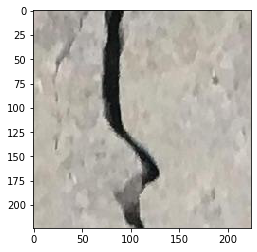

In [64]:
img1 = image.load_img("19751.jpg",target_size=(224,224,3,1))

# img1 = tf.cast(img1, tf.float32)
img1 = np.asarray(img1)

plt.imshow(img1)
#img1 = np.expand_dims(img1, axis=0)

output1 = vgg16.predict(img1)
print(output1)

if output1[0][1] == 0:
    print("negative")
else:
    print('positive')

### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).